<a href="https://colab.research.google.com/github/agmCorp/colab/blob/main/Barcode-pyzbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 1. Instalación de la librería base de ZBar (soluciona el ImportError)
!sudo apt-get install -y libzbar0

# 2. Instalación de los paquetes de Python: pyzbar, Pillow y OpenCV
!pip install pyzbar opencv-python Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


Por favor, sube tu imagen con el código de barras.


Saving IMG_9139.jpeg to IMG_9139.jpeg
✅ Archivo subido: IMG_9139.jpeg

✅ ¡Código(s) de barras encontrado(s) exitosamente! Resultados:
------------------------------
  Tipo de Código: CODE128
  Datos Decodificados: 303834A

🖼️ Imagen con la ROI del código de barras marcada:


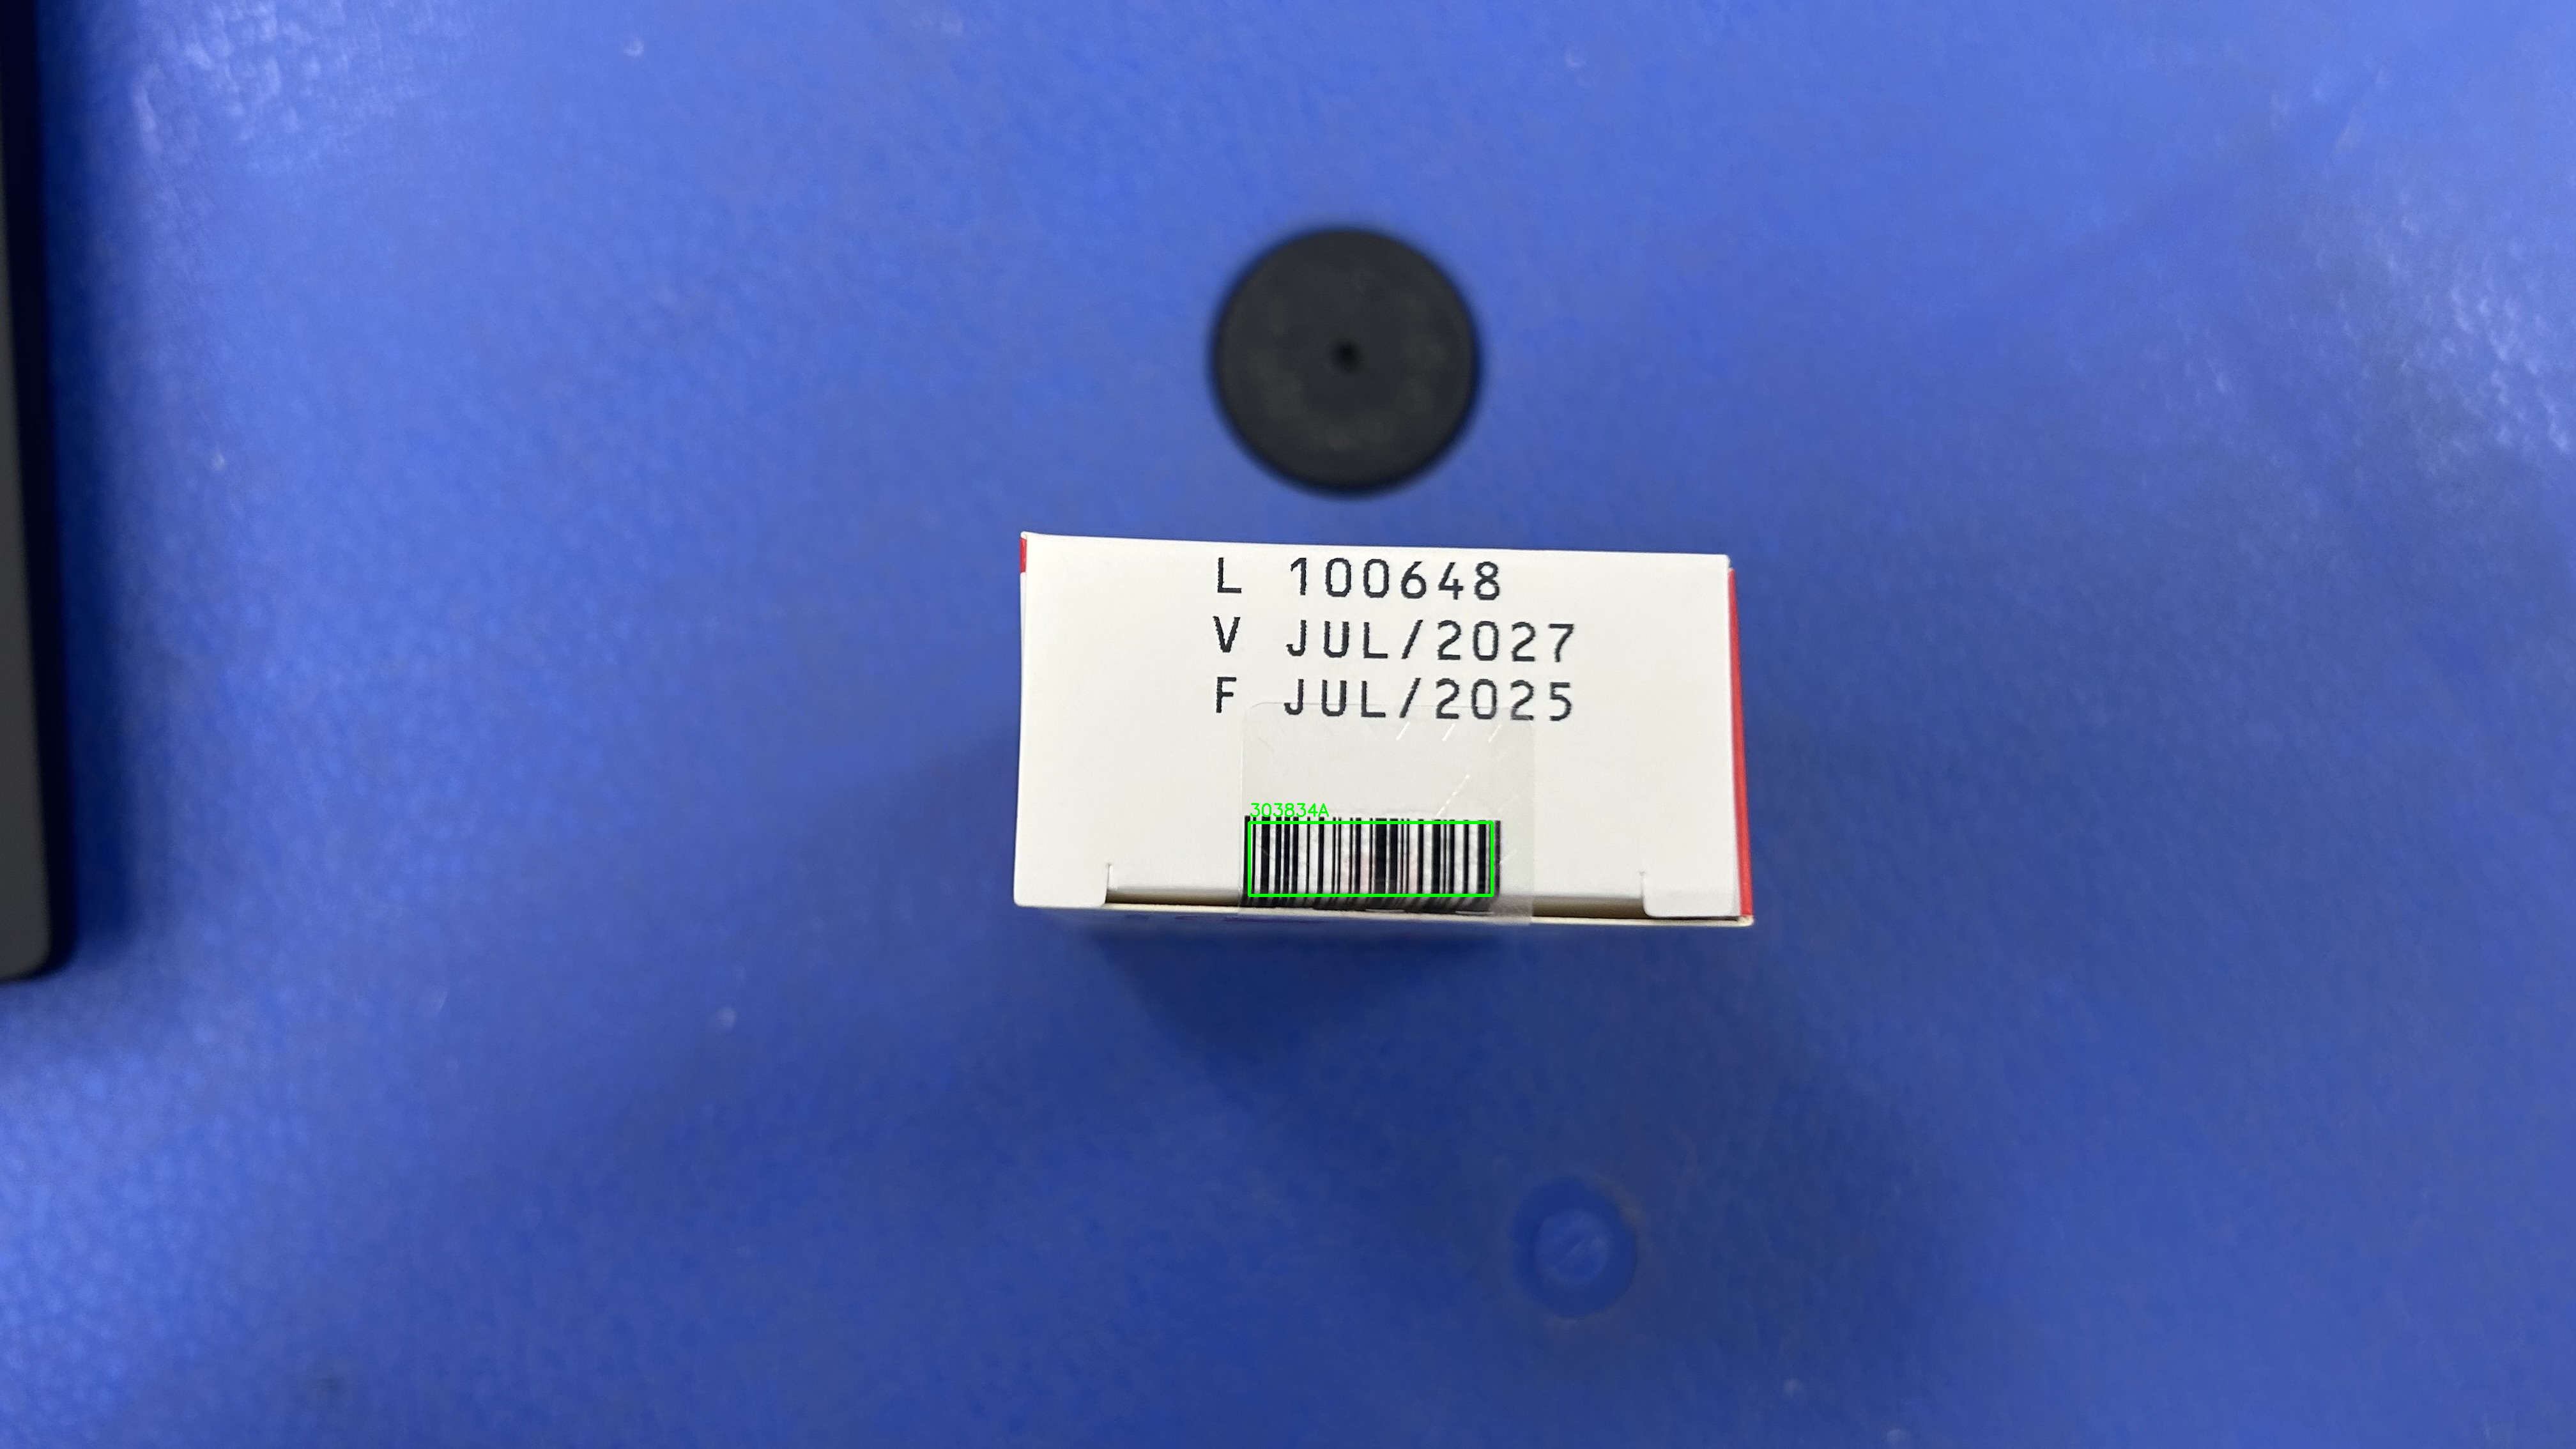

In [12]:
import io
import cv2
import numpy as np
from pyzbar.pyzbar import decode
from google.colab import files # cv2_imshow is the function of Colab to display OpenCV images
from google.colab.patches import cv2_imshow

# --- 1. Subida de la Imagen ---
print("Por favor, sube tu imagen con el código de barras.")
uploaded = files.upload()

if not uploaded:
    print("❌ No se subió ningún archivo.")
else:
    filename = next(iter(uploaded))
    print(f"✅ Archivo subido: {filename}")

    try:
        # Cargar la imagen usando OpenCV (desde bytes)
        image_bytes = uploaded[filename]
        nparr = np.frombuffer(image_bytes, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # Crear una copia para dibujar el rectángulo (la imagen original se mantendrá)
        img_drawn = img.copy()

        # Decodificar el código de barras
        decoded_objects = decode(img_drawn)

        # --- 2. Procesamiento de Resultados ---

        if decoded_objects:
            print("\n✅ ¡Código(s) de barras encontrado(s) exitosamente! Resultados:")

            for obj in decoded_objects:
                # Mostrar el resultado de la lectura
                tipo = obj.type
                datos = obj.data.decode('utf-8')

                print("-" * 30)
                print(f"  Tipo de Código: {tipo}")
                print(f"  Datos Decodificados: {datos}")

                # Obtener las coordenadas de la ROI (Región de Interés) del rectángulo
                (x, y, w, h) = obj.rect

                # Dibujar un rectángulo delimitador (ROI) en la imagen
                # (x, y) es la esquina superior izquierda, (x+w, y+h) es la esquina inferior derecha
                # (0, 255, 0) es el color verde en BGR, 3 es el grosor de la línea
                cv2.rectangle(img_drawn, (x, y), (x + w, y + h), (0, 255, 0), 3)

                # Colocar el texto decodificado encima del código de barras
                cv2.putText(img_drawn, datos, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            print("\n❌ No se encontraron códigos de barras en la imagen.")

        # --- 3. Mostrar la Imagen con la ROI Dibujada ---
        print("\n🖼️ Imagen con la ROI del código de barras marcada:")

        # Colab usa cv2_imshow para mostrar imágenes de OpenCV
        cv2_imshow(img_drawn)

    except Exception as e:
        print(f"\n❌ Ocurrió un error al procesar la imagen: {e}")